In [6]:
import json
import matplotlib.pyplot as plt
import matplotlib



# Load from files and pre-process data

In [10]:
compression_rates=[1,2,4,8,16,32,64]

architectures = ['cnn']
structures = ['structured', 'unstructured']
methods = ['random', 'magnitude']
scopes = ['local', 'global']
result_types = ['accuracies', 'pgd-success', 'cw2-success']
results = dict()

for architecture in architectures:
    for structure in structures:
        for method in methods:
            for scope in scopes:
                for result_type in result_types:
                    file_name = f'{architecture}-{method}-{scope}-{structure}-{result_type}.json'
                    try:
                        #print(f'saved-results/{file_name}')
                        with open(f'saved-results/{file_name}', 'r') as f:
                            res = json.load(f)
                            
                            if 'accuracies' in file_name:
                                avg = get_average(res, accuracies=True)
                            else:
                                avg = get_average(res)
                            results[f'{architecture}-{method}-{scope}-{structure}-{result_type}'] = avg
                    except Exception as err:

                        print('no such file: ' + file_name)

no such file: cnn-random-local-structured-accuracies.json
no such file: cnn-random-local-structured-pgd-success.json
no such file: cnn-random-local-structured-cw2-success.json
no such file: cnn-random-global-structured-accuracies.json
no such file: cnn-random-global-structured-pgd-success.json
no such file: cnn-random-global-structured-cw2-success.json
no such file: cnn-magnitude-local-structured-accuracies.json
no such file: cnn-magnitude-local-structured-pgd-success.json
no such file: cnn-magnitude-local-structured-cw2-success.json
no such file: cnn-magnitude-global-structured-accuracies.json
no such file: cnn-magnitude-global-structured-pgd-success.json
no such file: cnn-magnitude-global-structured-cw2-success.json
no such file: cnn-random-global-unstructured-accuracies.json
no such file: cnn-random-global-unstructured-pgd-success.json
no such file: cnn-random-global-unstructured-cw2-success.json


# Helper Functions

In [4]:
def get_average(all_values, accuracies=False):
    value_per_pruning_rate=[]
    for i in range(len(all_values)):
        for j in range(len(all_values[i])):
            
            try:
                if accuracies == False:
                    value_per_pruning_rate[j].append(all_values[i][j])
                if accuracies == True:
                    value_per_pruning_rate[j].append(all_values[i][j][1])
            except:
                value_per_pruning_rate.append([])
                if accuracies == False:
                    value_per_pruning_rate[j].append(all_values[i][j])
                if accuracies == True:
                    value_per_pruning_rate[j].append(all_values[i][j][1])
    avg_value_per_pruning_rate = [sum(x)/len(x) for x in value_per_pruning_rate]
    
    return avg_value_per_pruning_rate


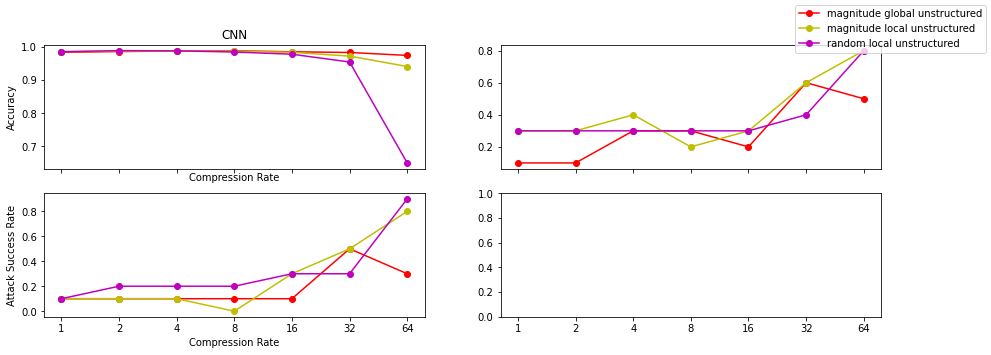

In [13]:

fig, (ax) = plt.subplots(2,2,figsize=(15,5), sharex=True)
matplotlib.rcParams['xtick.minor.size'] = 0
matplotlib.rcParams['xtick.minor.width'] = 0


#ax[0,0].plot(compression_rates, results['cnn-magnitude-global-structured-accuracies'],'go-',label='magnitude global struct')
ax[0,0].plot(compression_rates, results['cnn-magnitude-global-unstructured-accuracies'],'ro-', label='magnitude global unstructured')
#ax[0,0].plot(compression_rates, results['cnn-magnitude-local-structured-accuracies'],'bo-', label='magnitude local struct')
ax[0,0].plot(compression_rates, results['cnn-magnitude-local-unstructured-accuracies'],'yo-', label='magnitude local unstructured')
#ax[0,0].plot(compression_rates, results['cnn-random-local-structured-accuracies'],'co-', label='random local struct')
ax[0,0].plot(compression_rates, results['cnn-random-local-unstructured-accuracies'],'mo-', label='random local unstructured')

ax[0,0].set(title='CNN',ylabel='Accuracy', xlabel='Compression Rate')

#ax[1,0].plot(compression_rates, results['cnn-magnitude-global-structured-cw2-success'],'go-',label='magnitude global struct')
ax[1,0].plot(compression_rates, results['cnn-magnitude-global-unstructured-cw2-success'],'ro-', label='magnitude global unstructured')
#ax[1,0].plot(compression_rates, results['cnn-magnitude-local-structured-cw2-success'],'bo-', label='magnitude local struct')
ax[1,0].plot(compression_rates, results['cnn-magnitude-local-unstructured-cw2-success'],'yo-', label='magnitude local unstructured')
#ax[1,0].plot(compression_rates, results['cnn-random-local-structured-cw2-success'],'co-', label='random local struct')
ax[1,0].plot(compression_rates, results['cnn-random-local-unstructured-cw2-success'],'mo-', label='random local unstructured')

ax[1,0].set(title='',ylabel='CW2 Attack Success Rate', xlabel='Compression Rate')

#ax[0,1].plot(compression_rates, results['cnn-magnitude-global-structured-pgd-success'],'go-',label='magnitude global struct')
ax[0,1].plot(compression_rates, results['cnn-magnitude-global-unstructured-pgd-success'],'ro-', label='magnitude global unstructured')
#ax[0,1].plot(compression_rates, results['cnn-magnitude-local-structured-pgd-success'],'bo-', label='magnitude local struct')
ax[0,1].plot(compression_rates, results['cnn-magnitude-local-unstructured-pgd-success'],'yo-', label='magnitude local unstructured')
#ax[0,1].plot(compression_rates, results['cnn-random-local-structured-pgd-success'],'co-', label='random local struct')
ax[0,1].plot(compression_rates, results['cnn-random-local-unstructured-pgd-success'],'mo-', label='random local unstructured')

ax[0,1].set(title='',ylabel='PGD Attack Success Rate', xlabel='Compression Rate')

#ax[1,1].plot(compression_rates, results['cnn-magnitude-global-structured-bb0-success'],'go-',label='magnitude global struct')
ax[1,1].plot(compression_rates, results['cnn-magnitude-global-unstructured-bb0-success'],'ro-', label='magnitude global unstructured')
#ax[1,1].plot(compression_rates, results['cnn-magnitude-local-structured-bb0-success'],'bo-', label='magnitude local struct')
ax[1,1].plot(compression_rates, results['cnn-magnitude-local-unstructured-bb0-success'],'yo-', label='magnitude local unstructured')
#ax[1,1].plot(compression_rates, results['cnn-random-local-structured-bb0-success'],'co-', label='random local struct')
ax[1,1].plot(compression_rates, results['cnn-random-local-unstructured-bb0-success'],'mo-', label='random local unstructured')

ax[1,1].set(title='',ylabel='BB0 Attack Success Rate', xlabel='Compression Rate')

# format xscale
ax[1,0].set_xscale('log')
ax[1,0].set_xticks(compression_rates)

ax[1,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, )#loc='upper center')

plt.show()

In [68]:
results['cnn-magnitude-local-struct-accuracies']

[0.9856200039386749,
 0.985999995470047,
 0.986570006608963,
 0.9870000064373017,
 0.9871300041675568,
 0.987550002336502,
 0.9877900063991547]

In [69]:
results['cnn-random-local-struct-accuracies']

[0.9843600034713745,
 0.9863899946212769,
 0.9866699993610382,
 0.9870499968528748,
 0.9873600006103516,
 0.9874700009822845,
 0.9872499942779541]

In [71]:
for i in range (len(results['cnn-random-local-struct-accuracies'])):
    print(results['cnn-magnitude-local-struct-accuracies'][i]- results['cnn-random-local-struct-accuracies'][i])

0.0012600004673003484
-0.0003899991512298362
-9.999275207517311e-05
-4.999041557307571e-05
-0.0002299964427947554
8.000135421748489e-05
0.0005400121212005837


In [7]:
results

{}